In [198]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# import os
# from kaggle.api.kaggle_api_extended import KaggleApi
#
# # Initialize Kaggle API
# api = KaggleApi()
# api.authenticate()
#
# # Dataset identifier
# dataset = 'berkeleyearth/climate-change-earth-surface-temperature-data'
#
# # Download path
# download_path = './resource/'
# csv_file = os.path.join(download_path, 'GlobalTemperatures.csv')
#
# # Create directory if not exists
# if not os.path.exists(download_path):
#     os.makedirs(download_path)
#
# # Download and unzip the entire dataset
# api.dataset_download_files(dataset, path=download_path, unzip=True)
#
# # Check if file exists
# if os.path.exists(csv_file):
#     print("Download completed: GlobalTemperatures.csv")
# else:
#     print("File not found after download. Please check the dataset contents.")
#
# # Read the CSV for preview (optional)
# try:
#     df = pd.read_csv(csv_file)
#     print("File loaded successfully!")
#     print(df.head())
# except Exception as e:
#     print(f"Error reading the CSV: {e}")


In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# df_global_temp = pd.read_csv("resource/GlobalTemperatures.csv")
df_global_temp = pd.read_csv("resource/GlobalLandTemperaturesByCountry.csv")

df_global_temp['dt'] = pd.to_datetime(df_global_temp['dt'])
df_global_temp['year'] = df_global_temp['dt'].dt.year

num_cols = df_global_temp.select_dtypes(include=[np.number]).columns.drop('year')

df_global_temp[num_cols] = df_global_temp[num_cols].rolling(
    window=5, min_periods=1, center=True
).mean()

df_global_temp[num_cols] = df_global_temp[num_cols].fillna(df_global_temp[num_cols].mean())

# print(df_global_temp.isnull().sum(), "\n")
df_global_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
0,1743-11-01,4.38400,2.294000,Åland,1743
1,1743-12-01,4.38400,2.294000,Åland,1743
2,1744-01-01,4.38400,2.294000,Åland,1744
3,1744-02-01,1.53000,4.680000,Åland,1744
4,1744-03-01,4.11600,3.234500,Åland,1744
...,...,...,...,...,...
577457,2013-05-01,19.60800,0.601400,Zimbabwe,2013
577458,2013-06-01,18.91460,0.632000,Zimbabwe,2013
577459,2013-07-01,18.35775,0.666250,Zimbabwe,2013
577460,2013-08-01,18.12400,0.547667,Zimbabwe,2013


In [200]:
df_global_temp["decade"] = (df_global_temp["year"] // 10 * 10).astype(str) + "s"
# df_global_temp[["decade", "dt"]]
df_global_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year,decade
0,1743-11-01,4.384,2.2940,Åland,1743,1740s
1,1743-12-01,4.384,2.2940,Åland,1743,1740s
2,1744-01-01,4.384,2.2940,Åland,1744,1740s
3,1744-02-01,1.530,4.6800,Åland,1744,1740s
4,1744-03-01,4.116,3.2345,Åland,1744,1740s


In [201]:

df_global_temp['decade_num'] = df_global_temp['decade'].str.rstrip('s').astype(int)

decade_count = df_global_temp.groupby("Country")["decade_num"].nunique().reset_index()
decade_count.head()
decade_count = decade_count.rename(columns={'decade_num': 'decades_count'})

long_history_countries = decade_count[decade_count['decades_count'] >= 10]['Country']

df_filtered = df_global_temp[df_global_temp["Country"].isin(long_history_countries)].reset_index(drop=True)

df_filtered = df_filtered.merge(decade_count, on='Country', how='left')

df_filtered.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year,decade,decade_num,decades_count
0,1743-11-01,4.384,2.2940,Åland,1743,1740s,1740,28
1,1743-12-01,4.384,2.2940,Åland,1743,1740s,1740,28
2,1744-01-01,4.384,2.2940,Åland,1744,1740s,1740,28
3,1744-02-01,1.530,4.6800,Åland,1744,1740s,1740,28
4,1744-03-01,4.116,3.2345,Åland,1744,1740s,1740,28


In [202]:
print(df_filtered['decade_num'].max())
print(df_filtered['decade_num'].min())

short_history_countries = df_filtered[df_filtered['decades_count'] < 10]
short_history_countries


2010
1740


,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year,decade,decade_num,decades_count


In [203]:
grouped = df_filtered.groupby(['Country', 'decade_num'])['AverageTemperature'].mean().reset_index()
grouped.head()

,Country,decade_num,AverageTemperature
0,Afghanistan,1830,15.670806
1,Afghanistan,1840,13.556117
2,Afghanistan,1850,13.556922
3,Afghanistan,1860,13.478622
4,Afghanistan,1870,13.850883


# PART 2

In [204]:
matrix = grouped.pivot(index='Country', columns='decade_num', values='AverageTemperature').to_numpy()
# matrix[:5, :5]
# grouped.describe()

x1 = df_global_temp[(df_global_temp['Country'] == 'Iran') & (df_global_temp['decade_num'] == 1980)][
    'AverageTemperature'].mean()
x2 = grouped[(grouped['Country'] == 'Iran') & (grouped['decade_num'] == 1980)].iloc[0]["AverageTemperature"]

print("is same? ", round(x1, 3) == round(x2, 3))

is same?  True


In [205]:
x = df_filtered['decade_num'].values
y = df_filtered['AverageTemperature'].values
slope, intercept = np.polyfit(x, y, 1) #y = mx+b
# - slope (یا همون m): شیب خط → نشون می‌ده دما به ازای هر سال چقدر تغییر کرده
#- intercept (یا همون b): مقدار تقاطع با محور y → دمای تخمینی در سال صفر (فقط برای مدل‌سازی)

warming_rate_per_decade = slope * 10
print(f'slope: {slope}\nintercept: {intercept}\nwarming_rate_per_decade: {warming_rate_per_decade}')


slope: 0.037300573939363556
intercept: -53.785018736309766
warming_rate_per_decade: 0.37300573939363557


In [206]:
years_future = np.arange(2020, 2051)
slope_base = slope
slope_optimistic = slope * 0.7  # کاهش ۳۰٪
slope_pessimistic = slope * 1.5  # افزایش ۵۰٪

y_base = slope_base * years_future + intercept
y_optimistic = slope_optimistic * years_future + intercept
y_pessimistic = slope_pessimistic * years_future + intercept
print(f'base: {y_base}\noptimistic: {y_optimistic}\npessimistic: {y_pessimistic}')

base: [21.56214062 21.5994412  21.63674177 21.67404234 21.71134292 21.74864349
 21.78594406 21.82324464 21.86054521 21.89784579 21.93514636 21.97244693
 22.00974751 22.04704808 22.08434866 22.12164923 22.1589498  22.19625038
 22.23355095 22.27085153 22.3081521  22.34545267 22.38275325 22.42005382
 22.4573544  22.49465497 22.53195554 22.56925612 22.60655669 22.64385727
 22.68115784]
optimistic: [-1.04200719 -1.01589678 -0.98978638 -0.96367598 -0.93756558 -0.91145518
 -0.88534478 -0.85923437 -0.83312397 -0.80701357 -0.78090317 -0.75479277
 -0.72868236 -0.70257196 -0.67646156 -0.65035116 -0.62424076 -0.59813036
 -0.57201995 -0.54590955 -0.51979915 -0.49368875 -0.46757835 -0.44146795
 -0.41535754 -0.38924714 -0.36313674 -0.33702634 -0.31091594 -0.28480554
 -0.25869513]
pessimistic: [59.2357203  59.29167116 59.34762202 59.40357288 59.45952374 59.5154746
 59.57142547 59.62737633 59.68332719 59.73927805 59.79522891 59.85117977
 59.90713063 59.96308149 60.01903235 60.07498321 60.13093407 60.18

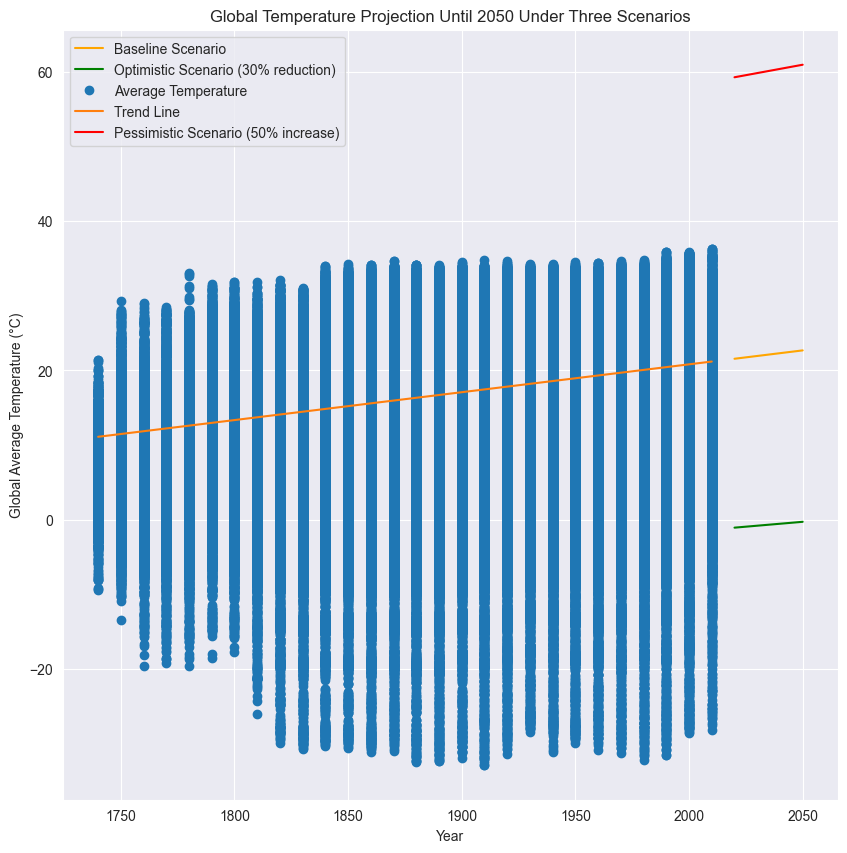

In [207]:
plt.figure(figsize=(10, 10))
plt.plot(years_future, y_base, label='Baseline Scenario', color='orange')
plt.plot(years_future, y_optimistic, label='Optimistic Scenario (30% reduction)', color='green')
plt.plot(x, y, 'o', label='Average Temperature')
plt.plot(x, slope * x + intercept, '-', label='Trend Line')
plt.plot(years_future, y_pessimistic, label='Pessimistic Scenario (50% increase)', color='red')

plt.xlabel('Year')
plt.ylabel('Global Average Temperature (°C)')
plt.title('Global Temperature Projection Until 2050 Under Three Scenarios')
plt.legend()
plt.grid(True)
plt.show()

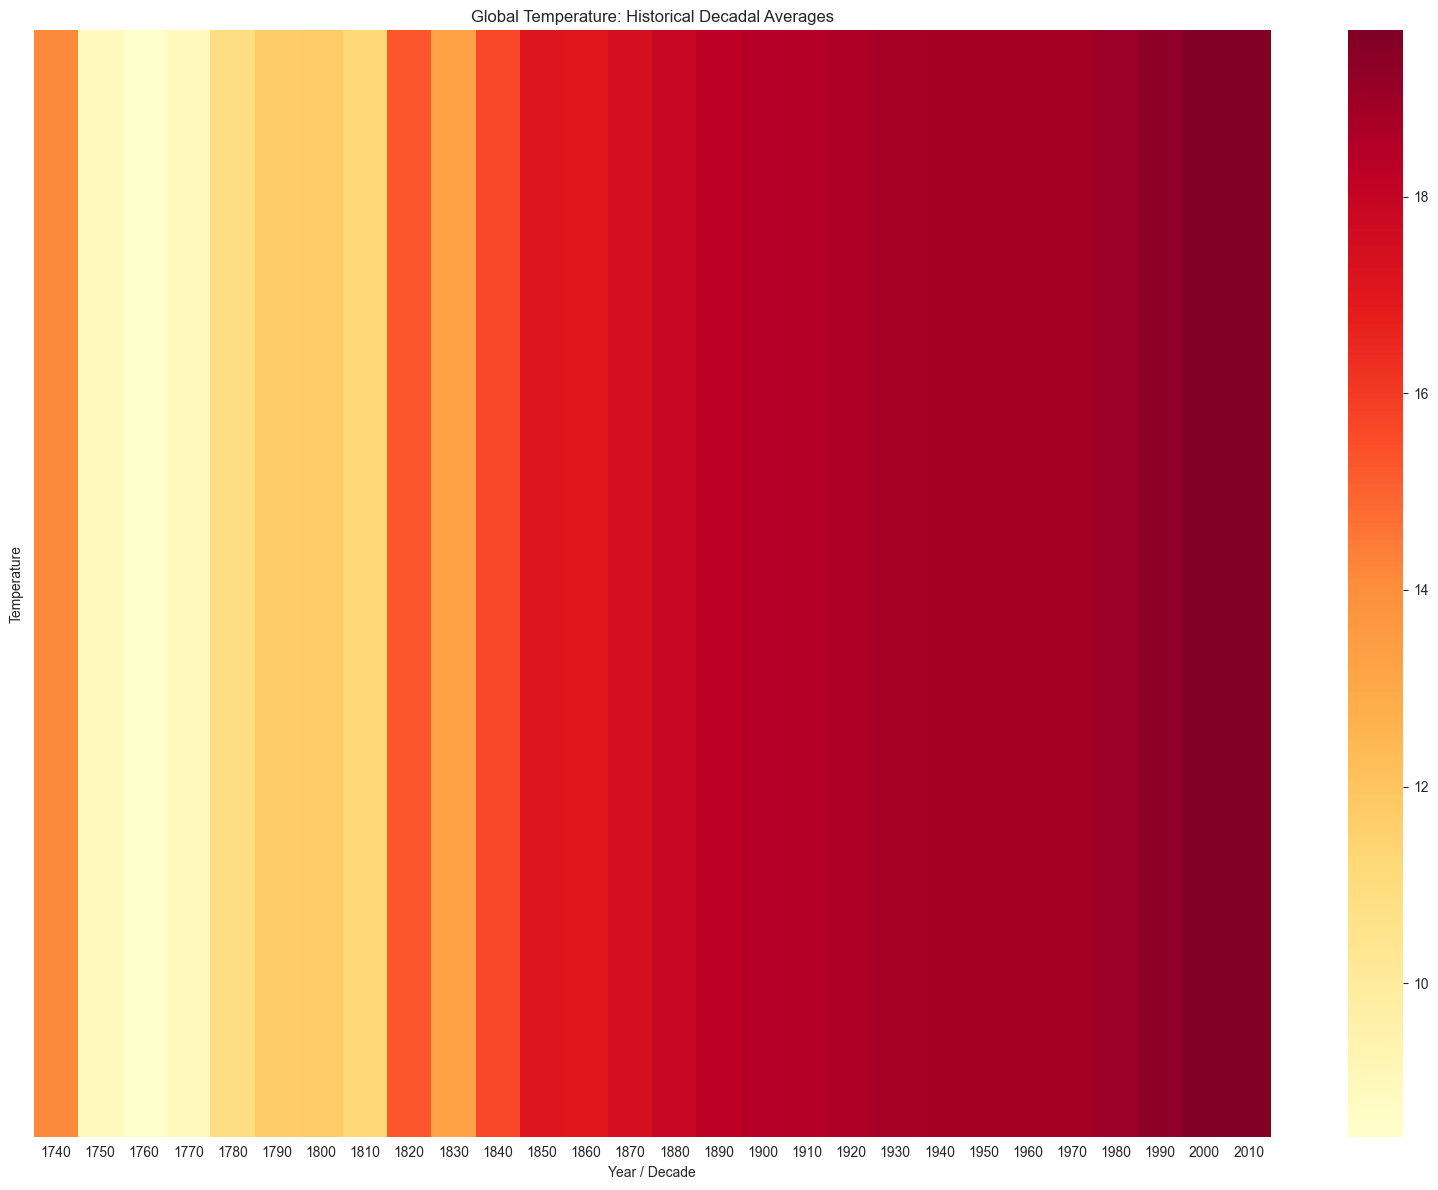

In [213]:
df_past = grouped.pivot(index='Country', columns='decade_num', values='AverageTemperature')
df_global_past = df_past.mean(axis=0)
df_past_series = pd.Series(df_global_past.values, index=df_global_past.index, name='Temperature')

fig, ax = plt.subplots(1, 1, figsize=(16, 12), sharex=True)

sns.heatmap(df_past_series.to_frame().T, ax=ax, cmap='YlOrRd', cbar=True)

ax.set_title('Global Temperature: Historical Decadal Averages')

plt.xlabel('Year / Decade')
plt.tight_layout()
plt.show()

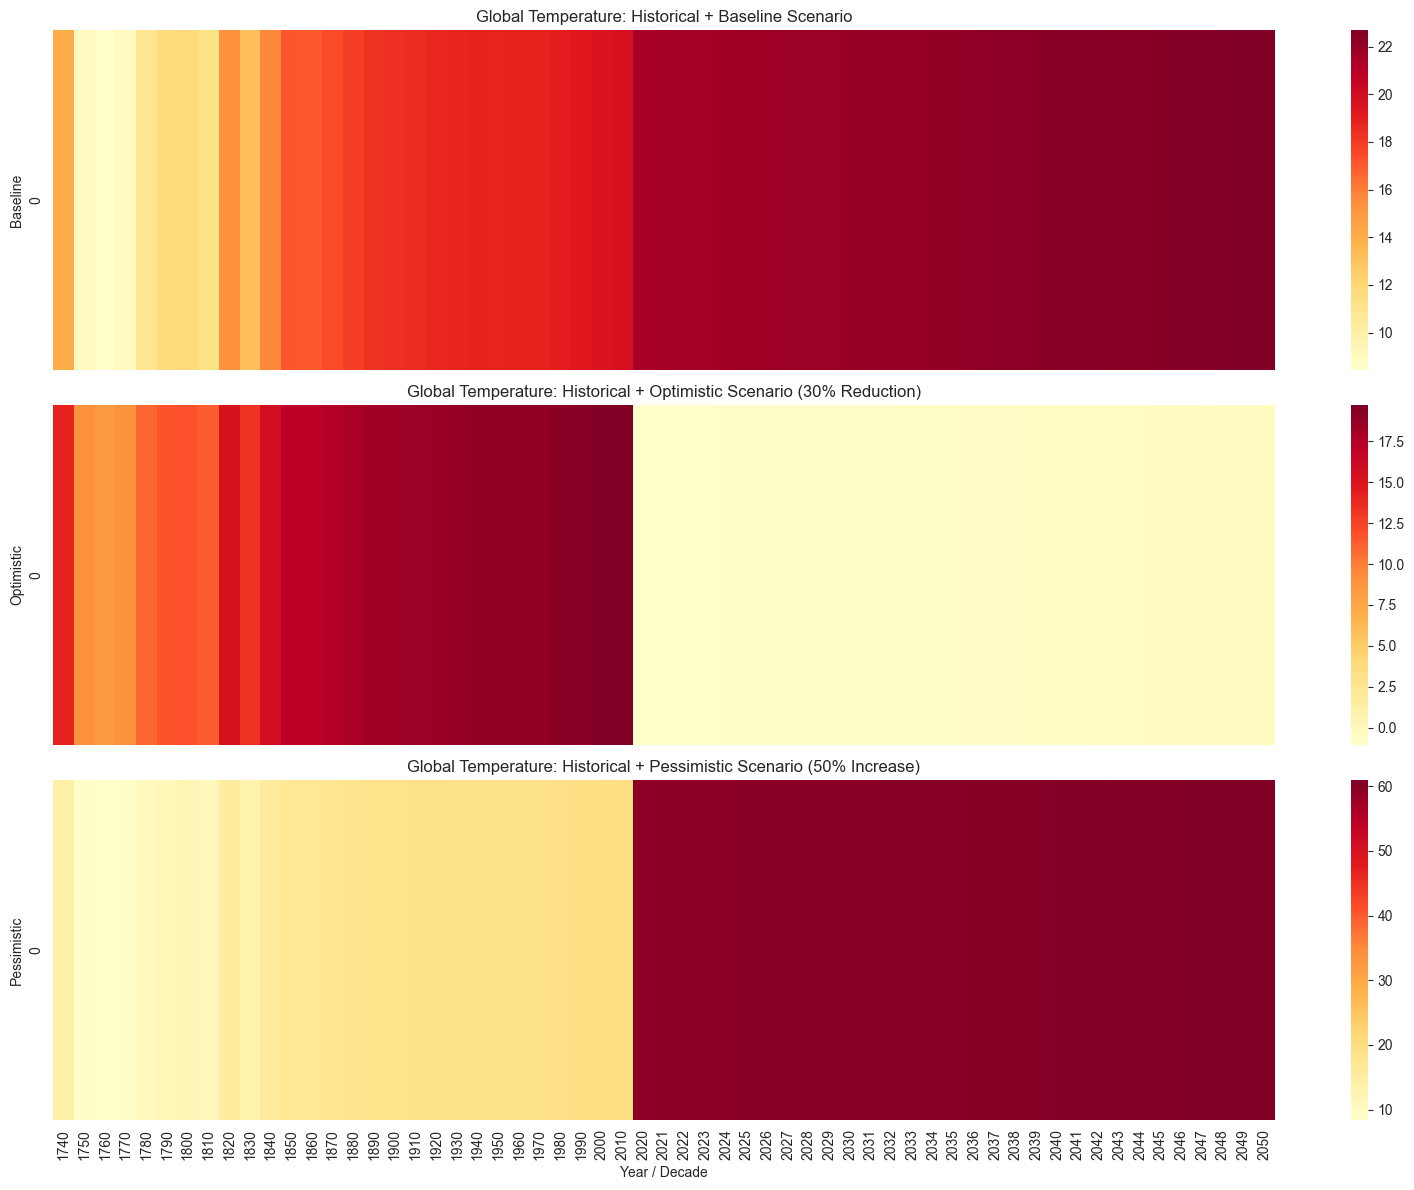

In [210]:
df_future = pd.DataFrame({
    'Baseline': y_base,
    'Optimistic': y_optimistic,
    'Pessimistic': y_pessimistic
}, index=years_future)

df_baseline = pd.concat([df_past_series, pd.Series(y_base, index=years_future)], axis=0).dropna().sort_index()
df_optimistic = pd.concat([df_past_series, pd.Series(y_optimistic, index=years_future)], axis=0).dropna().sort_index()
df_pessimistic = pd.concat([df_past_series, pd.Series(y_pessimistic, index=years_future)], axis=0).dropna().sort_index()

fig, axes = plt.subplots(3, 1, figsize=(16, 12), sharex=True)

sns.heatmap(df_baseline.to_frame().T, ax=axes[0], cmap='YlOrRd', cbar=True)
axes[0].set_ylabel('Baseline')
axes[0].set_title('Global Temperature: Historical + Baseline Scenario')

sns.heatmap(df_optimistic.to_frame().T, ax=axes[1], cmap='YlOrRd', cbar=True)
axes[1].set_ylabel('Optimistic')
axes[1].set_title('Global Temperature: Historical + Optimistic Scenario (30% Reduction)')

sns.heatmap(df_pessimistic.to_frame().T, ax=axes[2], cmap='YlOrRd', cbar=True)
axes[2].set_ylabel('Pessimistic')
axes[2].set_title('Global Temperature: Historical + Pessimistic Scenario (50% Increase)')

plt.xlabel('Year / Decade')
plt.tight_layout()
plt.show()

# PART 4

In [218]:
correlation_matrix = np.corrcoef(df_filtered["AverageTemperature"], df_filtered["decade_num"])
correlation = correlation_matrix[0, 1]
print(correlation)


0.24616251373187875


C:\Users\Ebrahim_sf\PycharmProjects\AI_HW\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


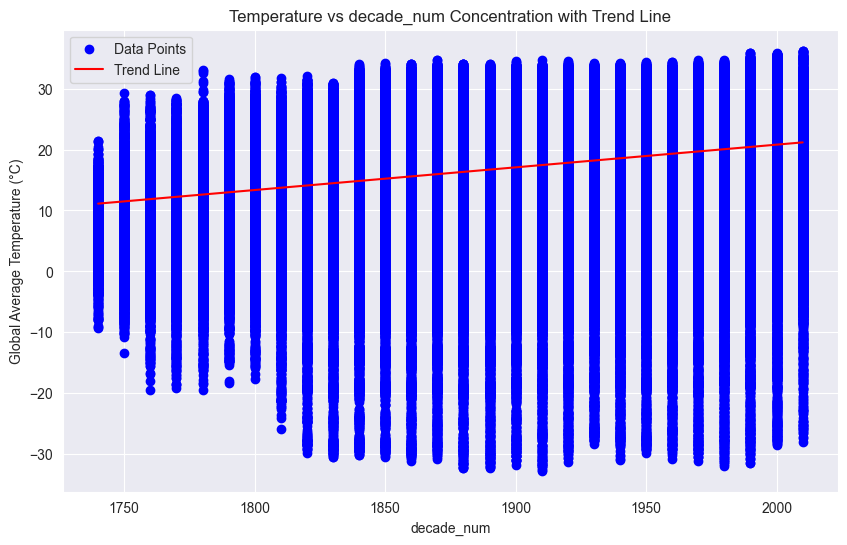

In [219]:
x = df_filtered["decade_num"]
y = df_filtered["AverageTemperature"]

correlation_matrix = np.corrcoef(x, y)
correlation = correlation_matrix[0, 1]

slope, intercept = np.polyfit(x, y, 1)
trend_line = slope * x + intercept

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data Points', color='blue')
plt.plot(x, trend_line, label='Trend Line', color='red')

plt.xlabel('decade_num')
plt.ylabel('Global Average Temperature (°C)')
plt.title('Temperature vs decade_num Concentration with Trend Line')
plt.legend()
plt.grid(True)
plt.show()